In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns
import os
# Stacking Model
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.getcwd()

'C:\\Users\\abc\\Code_base'

In [3]:
# changing directory
os.chdir('C:/Users/abc/Documents/monsoon_credit/DS Test')  

In [4]:
# loading the train data
train = pd.read_csv('Training/X_train.csv')
train.head() # printing first few 5 rows

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [5]:
train.shape

(33050, 44)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
Unique_ID    33050 non-null object
C1           33050 non-null int64
C2           33050 non-null int64
C3           33050 non-null int64
C4           33050 non-null int64
C5           33050 non-null int64
C6           33050 non-null bool
C7           33050 non-null int64
C8           33050 non-null bool
N1           33050 non-null float64
N2           28438 non-null float64
N3           32685 non-null float64
N4           28444 non-null float64
N5           28444 non-null float64
N6           32685 non-null float64
N7           32623 non-null float64
N8           33050 non-null int64
N9           33050 non-null int64
N10          32623 non-null float64
N10.1        32623 non-null float64
N11          32334 non-null float64
N12          28436 non-null float64
N14          32442 non-null float64
N15          32623 non-null float64
N16          28444 non-null float64
N17          2

In [7]:
train.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


In [145]:
y=pd.read_csv('Training/y_train.csv')

In [9]:
y.shape

(33050, 2)

In [10]:
y.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


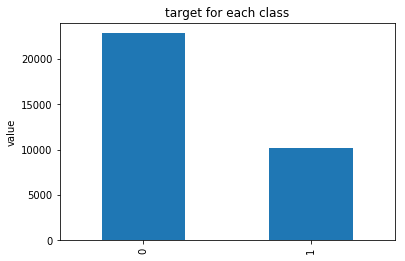

In [11]:
# plotting bar plot of target values
y.Dependent_Variable.value_counts().plot.bar()
plt.ylabel('value')
plt.title('target for each class')
plt.show()

In [12]:
y.Dependent_Variable.value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

<h4> As the classes are slightly unbalanced so we will also employ oversampling techniques while modelling.</h4>

### Data Cleaning

In [13]:
train['N26'].isnull().sum()/len(train)

0.8102571860816944

In [14]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
train = train[train.columns[train.isnull().sum()/len(train) < threshold]]

In [15]:
# Now the required column remains to 36 which was previously 44.
train.shape

(33050, 36)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 36 columns):
Unique_ID    33050 non-null object
C1           33050 non-null int64
C2           33050 non-null int64
C3           33050 non-null int64
C4           33050 non-null int64
C5           33050 non-null int64
C6           33050 non-null bool
C7           33050 non-null int64
C8           33050 non-null bool
N1           33050 non-null float64
N2           28438 non-null float64
N3           32685 non-null float64
N4           28444 non-null float64
N5           28444 non-null float64
N6           32685 non-null float64
N7           32623 non-null float64
N8           33050 non-null int64
N9           33050 non-null int64
N10          32623 non-null float64
N10.1        32623 non-null float64
N11          32334 non-null float64
N12          28436 non-null float64
N14          32442 non-null float64
N15          32623 non-null float64
N16          28444 non-null float64
N17          2

In [16]:
# filling nan value in numerical column with the median
for i in train.columns:
    if train[i].dtypes==float:
        if train[i].isnull().sum()>0:
            mediancol=train[i].median()
            train[i].fillna(mediancol,inplace=True)
            

In [17]:
# Checking if all of the columns are completely filled or not
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 36 columns):
Unique_ID    33050 non-null object
C1           33050 non-null int64
C2           33050 non-null int64
C3           33050 non-null int64
C4           33050 non-null int64
C5           33050 non-null int64
C6           33050 non-null bool
C7           33050 non-null int64
C8           33050 non-null bool
N1           33050 non-null float64
N2           33050 non-null float64
N3           33050 non-null float64
N4           33050 non-null float64
N5           33050 non-null float64
N6           33050 non-null float64
N7           33050 non-null float64
N8           33050 non-null int64
N9           33050 non-null int64
N10          33050 non-null float64
N10.1        33050 non-null float64
N11          33050 non-null float64
N12          33050 non-null float64
N14          33050 non-null float64
N15          33050 non-null float64
N16          33050 non-null float64
N17          3

In [18]:
train_data=train.copy()

In [22]:
train_data.head()

,Unique_ID,C1,C2,C3,C4,C5,C7,N1,N2,N3,...,N20,N21,N22,N23,N24,N33,N34,N35,C6_bool,C8_bool
0,Candidate_5926,1,0,11,31,0,0,23.75,53.0,2.5,...,20.0,0.92,1.0,27.816,1750.000000,58.0,113.39,12.0,0,1
1,Candidate_48134,1,4,2,66,2,1,11.05,22.0,3.7,...,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0,0,1
2,Candidate_51717,1,0,19,2,0,0,29.00,53.0,2.4,...,20.0,0.92,1.0,20.000,6250.000000,24.0,50.29,18.0,0,1
3,Candidate_26401,1,1,16,47,1,4,17.99,1.0,3.5,...,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0,0,1
4,Candidate_34872,1,1,13,1,1,6,27.50,206.0,3.8,...,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0,1,1


In [20]:
def mapping(x):
    if x==False:
        return 0
    else:
        return 1

In [21]:
# Mapping boolean columns to 0-1 encoding(0 to False and 1 to True)
bool_column_list=['C6','C8']
for i in bool_column_list:
    numerical_conversion=train_data[i]
    train_data[i+'_bool']=numerical_conversion.map(mapping)
    train_data.drop(i,inplace=True,axis=1)

In [24]:
y.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [25]:
train_data.drop('Unique_ID',inplace=True,axis=1)

In [26]:
# Train-Test split
X_train,X_test, y_train, y_test = train_test_split(train_data , y['Dependent_Variable'], stratify=y['Dependent_Variable'], test_size=0.3, random_state=42)

### Build Random model to find the best features(Feature Selection) so for them we can perform Feature Engineering

In [27]:
random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[200,300,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5) # Performing Grid Search to find the most optimal parameters

random_grid.fit(X_train, y_train)

print("Best HyperParameter: ",random_grid.best_params_)

Best HyperParameter:  {'max_features': 6, 'n_estimators': 300}


In [28]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    max_depth=6,  
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores 
    class_weight='balanced')    # our classes are skewed


rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [29]:
#prdicting on train dataset
rf_pred_probs=rf_model.predict(X_train)
auc=metrics.roc_auc_score(y_train,rf_pred_probs)
auc

0.6931879655430481

In [30]:
#prdicting on test dataset
rf_pred_probs=rf_model.predict(X_test)
auc=metrics.roc_auc_score(y_test,rf_pred_probs)
auc

0.6712886259485016

In [31]:
# feature importances with their relative importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
N1,0.244362
N3,0.106459
N6,0.104842
N11,0.071627
N10.1,0.050100
N34,0.049574
N10,0.045342
N19,0.034812
N24,0.029010
N23,0.025899


In [32]:
feature_importances.index

Index(['N1', 'N3', 'N6', 'N11', 'N10.1', 'N34', 'N10', 'N19', 'N24', 'N23',
       'N33', 'C1', 'C2', 'N9', 'N8', 'C3', 'N21', 'N18', 'C5', 'C4', 'N17',
       'N12', 'N22', 'N14', 'C7', 'N35', 'N7', 'N2', 'N20', 'N4', 'N5', 'N15',
       'C8_bool', 'C6_bool', 'N16'],
      dtype='object')

In [37]:
# Taking the top most 30 useful features based on their importance
data=train_data[['N1', 'N3', 'N6', 'N11', 'N10.1', 'N34', 'N10', 'N19', 'N24', 'N23',
       'N33', 'C1', 'C2', 'N9', 'N8', 'C3', 'N21', 'N18', 'C5', 'C4', 'N17',
       'N12', 'N22', 'N14', 'C7', 'N35', 'N7', 'N2', 'N20', 'N4']]

In [38]:
data.shape

(33050, 30)

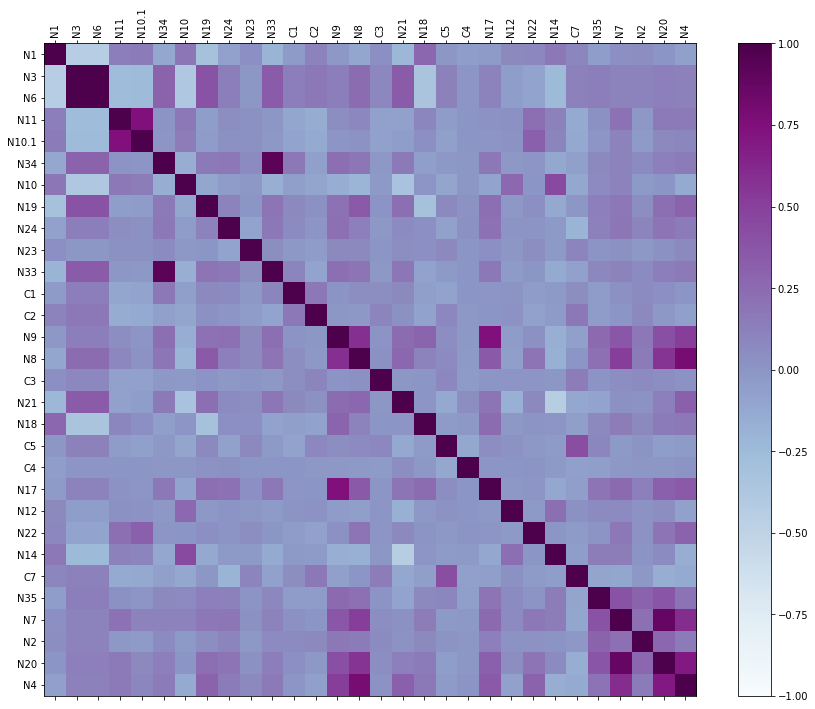

In [39]:
# Checking feature dependency on other features by plotting heatmap of all features
names = data.columns
correlations = data.corr()
# plot correlation matrix
plt.rcParams['figure.figsize'] = (15,12)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap="BuPu")
fig.colorbar(cax)
ticks = np.arange(0,30,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)
plt.show()

* Here, we see features N11 and N10.1 are correlated with each other so will we use either one of them for modelling.
* Similarly, fearures N33 and N34 are correlated with each other so remove either of them based on their importance.
* Similarly, fearures N3 and N6 are correlated with each other so remove either of them based on their importance.

In [40]:
# dropping the redundant features
data.drop('N10.1',axis=1,inplace=True)
data.drop('N33',axis=1,inplace=True)
data.drop('N6',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
# performing feature engineering by binning real valued features using Decision tree
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(data.N3.to_frame(), y['Dependent_Variable'])
data['N3_tree']=tree_model.predict_proba(data.N3.to_frame())[:,1]

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
data['N3_tree'].unique()

array([0.61048544, 0.16240461, 0.3016811 , 0.44401659])

In [46]:
pd.concat([data.groupby(['N3_tree'])['N3'].min(),
            data.groupby(['N3_tree'])['N3'].max()], axis=1)

,N3,N3
N3_tree,,
0.162405,3.7,4.4
0.301681,3.1,3.6
0.444017,2.8,3.0
0.610485,0.0,2.7


In [47]:
bin_ranges = [0,1,2,3,4,5]
bin_names = [1, 2, 3, 4,5]
data['N3_label'] = pd.cut(np.array(data['N3']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [48]:
data.drop('N3_tree',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(data.N1.to_frame(), y['Dependent_Variable'])
data['N1_tree']=tree_model.predict_proba(data.N1.to_frame())[:,1]
data['N1_tree'].unique()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.4360098 , 0.19593709, 0.31791908, 0.07188841])

In [50]:
pd.concat([data.groupby(['N1_tree'])['N1'].min(),
            data.groupby(['N1_tree'])['N1'].max()], axis=1)

,N1,N1
N1_tree,,
0.071888,0.00,10.35
0.195937,10.36,14.99
0.317919,15.00,21.99
0.436010,22.00,48.00


In [51]:
bin_ranges = [0,10,14,15,21,22,48]
bin_names = [1, 2, 3, 4,5,6]
data['N1_label'] = pd.cut(np.array(data['N1']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
data.drop('N1_tree',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(data.N11.to_frame(), y['Dependent_Variable'])
data['N11_tree']=tree_model.predict_proba(data.N11.to_frame())[:,1]
data['N11_tree'].unique()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.3103335 , 0.44082918, 0.24070553, 0.59371555])

In [58]:
pd.concat([data.groupby(['N11_tree'])['N11'].min(),
            data.groupby(['N11_tree'])['N11'].max()], axis=1)

,N11,N11
N11_tree,,
0.240706,0.0,4.0
0.310333,5.0,11.0
0.440829,12.0,20.0
0.593716,21.0,379.0


In [59]:
bin_ranges = [0,4,5,11,12,20,21,379]
bin_names = [1, 2, 3, 4,5,6,7]
data['N11_label'] = pd.cut(np.array(data['N11']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
data.drop('N11_tree',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [62]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(data.N34.to_frame(), y['Dependent_Variable'])
data['N34_tree']=tree_model.predict_proba(data.N34.to_frame())[:,1]
data['N34_tree'].unique()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.31451535, 0.14041096, 0.08031088, 0.47368421])

In [63]:
pd.concat([data.groupby(['N34_tree'])['N34'].min(),
            data.groupby(['N34_tree'])['N34'].max()], axis=1)

,N34,N34
N34_tree,,
0.080311,7.58,34.56
0.140411,0.00,6.79
0.314515,34.57,837.86
0.473684,838.11,2153.38


In [64]:
bin_ranges = [0,6,7,34,837,838,2153]
bin_names = [1, 2, 3, 4,5,6]
data['N34_label'] = pd.cut(np.array(data['N34']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [65]:
data.drop('N34_tree',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(data.N19.to_frame(), y['Dependent_Variable'])
data['N19_tree']=tree_model.predict_proba(data.N19.to_frame())[:,1]
data['N19_tree'].unique()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.34667025, 0.1688343 , 0.25503289, 0.44909274])

In [70]:
pd.concat([data.groupby(['N19_tree'])['N19'].min(),
            data.groupby(['N19_tree'])['N19'].max()], axis=1)

,N19,N19
N19_tree,,
0.168834,22064.0,646285.0
0.255033,3383.0,22061.0
0.346670,116.0,3382.0
0.449093,0.0,115.0


In [71]:
bin_ranges = [0,115,116,3382,3383,22061,22064,646285]
bin_names = [1, 2, 3, 4,5,6,7]
data['N19_label'] = pd.cut(np.array(data['N19']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [72]:
data.drop('N19_tree',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
data.drop('N1',axis=1,inplace=True)
data.drop('N3',axis=1,inplace=True)
data.drop('N11',axis=1,inplace=True)
data.drop('N34',axis=1,inplace=True)
data.drop('N19',axis=1,inplace=True)

In [121]:
nulls = data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [76]:
#filling the nan value in bin columns with the most occuring bin label
data.N1_label.fillna(data.N1_label.mode()[0],inplace=True)
data.N3_label.fillna(data.N3_label.mode()[0],inplace=True)
data.N11_label.fillna(data.N11_label.mode()[0],inplace=True)
data.N34_label.fillna(data.N34_label.mode()[0],inplace=True)
data.N19_label.fillna(data.N19_label.mode()[0],inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [176]:
data.head()

,N10,N24,N23,C1,C2,N9,N8,C3,N21,N18,...,N35,N7,N2,N20,N4,N3_label,N1_label,N11_label,N34_label,N19_label
0,2.0,1750.000000,27.816,1,0,0,0,11,0.92,0.56,...,12.0,10.0,53.0,20.0,9.0,3,6,2,4,3
1,0.0,10833.333330,40.000,1,4,72,4,2,0.88,0.06,...,17.0,19.0,22.0,17.0,16.0,4,2,3,4,7
2,7.0,6250.000000,20.000,1,0,15,2,19,0.92,0.56,...,18.0,17.0,53.0,20.0,9.0,3,6,5,4,3
3,0.0,2413.666667,26.000,1,1,190,5,16,1.00,0.89,...,27.0,6.0,1.0,6.0,4.0,4,4,1,4,3
4,0.0,7666.666667,44.000,1,1,1504,10,13,0.96,0.97,...,21.0,31.0,206.0,31.0,11.0,4,6,1,4,5


In [204]:
# Train-Test split
X_train,X_test, y_train, y_test = train_test_split(data , y['Dependent_Variable'], stratify=y['Dependent_Variable'], test_size=0.3, random_state=42)

### 1.Random Forest Classifier

In [182]:
random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[200,300,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5) # Performing Grid Search to find the most optimal parameters

random_grid.fit(X_train, y_train)

print("Best HyperParameter: ",random_grid.best_params_)

Best HyperParameter:  {'max_features': 6, 'n_estimators': 500}


In [205]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=6,  
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores 
    class_weight='balanced')    # our classes are skewed


rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [206]:
rf_pred_probs=rf_model.predict(X_train)
auc=metrics.roc_auc_score(y_train,rf_pred_probs)
auc

0.6953194617871209

In [207]:
rf_pred_probs=rf_model.predict(X_test)
auc=metrics.roc_auc_score(y_test,rf_pred_probs)
auc

0.6644928398867589

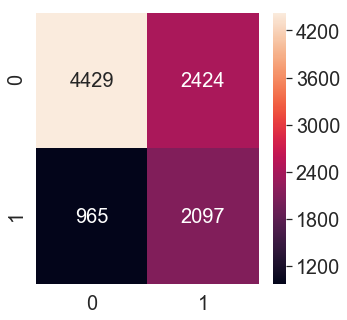

In [200]:
# Confusion Matrix 
df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, rf_pred_probs), range(2),range(2))
#sns.set(font_scale=1.8)#for label size
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

### 2.Gradient Boosting Classifier

In [147]:

tuned_parameters =  {'n_estimators':[25, 50, 75,100,125,150,175,200],'max_depth':[3,5,7,9,10]}
model = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

print("Best HyperParameter: ",model.best_params_)

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best HyperParameter:  {'max_depth': 3, 'n_estimators': 150}


In [155]:
clf = GradientBoostingClassifier(n_estimators= 150,max_depth=3)
clf.fit(X_train,y_train)
y_pred_tr=clf.predict(X_train)
auc=metrics.roc_auc_score(y_train,y_pred_tr)
auc

0.6453396141502608

In [156]:
y_pred=clf.predict(X_test)
auc=metrics.roc_auc_score(y_test,y_pred)
auc

0.6177088933860964

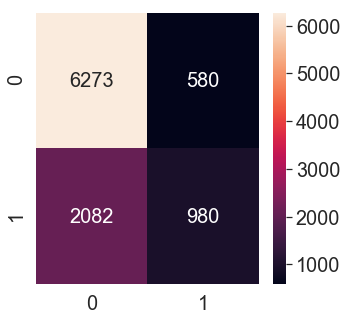

In [160]:
df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), range(2),range(2))
#sns.set(font_scale=1.8)#for label size
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

### 3. Stacking Model

In [201]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=7,  
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores 
    class_weight='balanced')    # our classes are skewed


rf_model.fit(X=X_train, y=y_train)

clf = GradientBoostingClassifier(n_estimators= 150,max_depth=3)
clf.fit(X_train,y_train)


print("Random Forest :  AUC Test: %0.2f" % (metrics.roc_auc_score(y_test, rf_model.predict(X_test))))
print("GradientBoosting : AUC Test: %0.2f" % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

print("-"*50)


Random Forest :  AUC Test: 0.67
GradientBoosting : AUC Test: 0.62
--------------------------------------------------


In [202]:
lr = RandomForestClassifier(n_estimators=500,max_depth=7)
sclf = StackingClassifier(classifiers=[rf_model, clf], meta_classifier=lr)
sclf.fit(X_train, y_train)

y_pred=sclf.predict(X_train)
auc=metrics.roc_auc_score(y_train,y_pred)

print("AUC (train) on the stacking classifier :",auc)

y_pred=sclf.predict(X_test)
auc_test=metrics.roc_auc_score(y_test,y_pred)

print("AUC (test) on the stacking classifier :",auc_test)


AUC (train) on the stacking classifier : 0.6453396141502608
AUC (test) on the stacking classifier : 0.6178721853521317


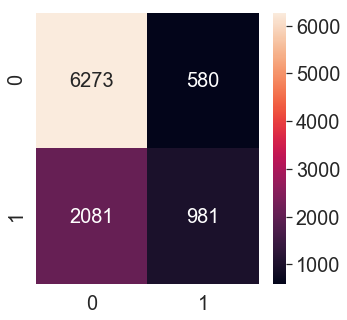

In [203]:
df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), range(2),range(2))
#sns.set(font_scale=1.8)#for label size
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

### Data Modelling with oversampling the data

In [124]:
# Merging data with the output variable
X = pd.concat([data,y['Dependent_Variable']],axis=1)

In [125]:
X.head()

,N10,N24,N23,C1,C2,N9,N8,C3,N21,N18,...,N7,N2,N20,N4,N3_label,N1_label,N11_label,N34_label,N19_label,Dependent_Variable
0,2.0,1750.000000,27.816,1,0,0,0,11,0.92,0.56,...,10.0,53.0,20.0,9.0,3,6,2,4,3,1
1,0.0,10833.333330,40.000,1,4,72,4,2,0.88,0.06,...,19.0,22.0,17.0,16.0,4,2,3,4,7,0
2,7.0,6250.000000,20.000,1,0,15,2,19,0.92,0.56,...,17.0,53.0,20.0,9.0,3,6,5,4,3,1
3,0.0,2413.666667,26.000,1,1,190,5,16,1.00,0.89,...,6.0,1.0,6.0,4.0,4,4,1,4,3,0
4,0.0,7666.666667,44.000,1,1,1504,10,13,0.96,0.97,...,31.0,206.0,31.0,11.0,4,6,1,4,5,0


In [129]:
# Perform OverSampling
df_maj = X[X.Dependent_Variable==0]
df_min = X[X.Dependent_Variable==1]
df_maj.shape,df_min.shape 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=42) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])

In [132]:
y_over=X['Dependent_Variable']

In [133]:
X.drop('Dependent_Variable',axis=1,inplace=True)

In [211]:
X_train,X_test, y_train, y_test = train_test_split(X , y_over, stratify=y_over, test_size=0.3, random_state=42)

In [139]:
random_classifier = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[200,300,500]}

random_grid = GridSearchCV(random_classifier, parameters, cv = 5) # Performing Grid Search to find the most optimal parameters

random_grid.fit(X_train, y_train)

print("Best HyperParameter: ",random_grid.best_params_)

Best HyperParameter:  {'max_features': 6, 'n_estimators': 300}


In [213]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    max_depth=6,  
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores 
    class_weight='balanced')    # our classes are skewed


rf_model.fit(X=X_train, y=y_train)
rf_pred_probs=rf_model.predict(X_train)
auc=metrics.roc_auc_score(y_train,rf_pred_probs)
auc

0.6821739445333296

In [214]:
rf_pred_probs=rf_model.predict(X_test)
auc=metrics.roc_auc_score(y_test,rf_pred_probs)
auc

0.6621546409468675

In [215]:
clf = GradientBoostingClassifier(n_estimators= 150,max_depth=3)
clf.fit(X_train,y_train)
y_pred_tr=clf.predict(X_train)
auc=metrics.roc_auc_score(y_train,y_pred_tr)
auc

0.6453396141502608

In [216]:
y_pred=clf.predict(X_test)
auc=metrics.roc_auc_score(y_test,y_pred)
auc

0.6177088933860964

> By performing oversampling auc score is not improving much it is same as that without oversampling so for final predictions we will not use oversampling.

### Test Dataset

In [171]:
#Reading test data for predictions
test=pd.read_csv('Test/X_test.csv')
test.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [172]:
# Performing feature engineering and feature selection on test data
def processTest(df):
    threshold = 0.7
    df = df[df.columns[df.isnull().sum()/len(df) < threshold]]
    
    # filling nan value in numerical column with the median
    for i in df.columns:
        if df[i].dtypes==float:
            if df[i].isnull().sum()>0:
                mediancol=df[i].median()
                df[i].fillna(mediancol,inplace=True)
    
    df_subset=df[['N1', 'N3', 'N11', 'N34', 'N10', 'N19', 'N24', 'N23',
        'C1', 'C2', 'N9', 'N8', 'C3', 'N21', 'N18', 'C5', 'C4', 'N17',
       'N12', 'N22', 'N14', 'C7', 'N35', 'N7', 'N2', 'N20', 'N4']]
    return df_subset

In [173]:
test_data=processTest(test)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [174]:
test_data.shape

(11017, 27)

In [175]:
nulls = test_data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [189]:
# Predicting probabilities for each class
predicted_probs = rf_model.predict_proba(test_data)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_probs)

[[0.50668049 0.49331951]
 [0.45640165 0.54359835]
 [0.44183799 0.55816201]
 ...
 [0.50428276 0.49571724]
 [0.50059156 0.49940844]
 [0.44401978 0.55598022]]


In [190]:
# Storing class1 probabilities in lst
lst=[]
for class_1 in predicted_probs:
    lst.append(class_1[1])

In [193]:
np_list=np.array(lst)

In [195]:
my_submission = pd.DataFrame({'Unique_ID': test.Unique_ID, 'Class_1_Probability': np_list})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [217]:
from prettytable import PrettyTable
ptable = PrettyTable()

ptable.field_names=["Model Name","with/without oversampling","Train AUC Score","Test AUC Score"]
ptable.add_row(["Random Forest","without","0.695","0.664"])
ptable.add_row(["Gradient boost","without","0.645","0.617"])
ptable.add_row(["Stacking","without","0.645","0.617"])
ptable.add_row(["Random Forest","with","0.682","0.662"])
ptable.add_row(["Gradient boost","with","0.645","0.617"])
print(ptable)

+----------------+---------------------------+-----------------+----------------+
|   Model Name   | with/without oversampling | Train AUC Score | Test AUC Score |
+----------------+---------------------------+-----------------+----------------+
| Random Forest  |          without          |      0.695      |     0.664      |
| Gradient boost |          without          |      0.645      |     0.617      |
|    Stacking    |          without          |      0.645      |     0.617      |
| Random Forest  |            with           |      0.682      |     0.662      |
| Gradient boost |            with           |      0.645      |     0.617      |
+----------------+---------------------------+-----------------+----------------+
